# LINEAR REGRESSION

## DATABASE USED = FISH MARKET FROM KAGGLE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Fish.csv")
print(data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


#### Preparing the data

In [4]:
features = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
feature_list = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

feature1 = data['Length1']
feature2 = data['Length2']
feature3 = data['Length3']
feature4 = data['Height']
feature5 = data['Width']

target = data['Weight']

#### Normalizing the data

In [5]:
def normalize_feature(X):
    feature_mean = X.mean()
    feature_std = X.std()

    feature_normalized = (X - feature_mean)/feature_std

    return feature_normalized, feature_mean, feature_std

feature_1_normalized, feature_1_mean, feature_1_std = normalize_feature(feature1)
feature_2_normalized, feature_2_mean, feature_2_std = normalize_feature(feature2)
feature_3_normalized, feature_3_mean, feature_3_std = normalize_feature(feature3)
feature_4_normalized, feature_4_mean, feature_4_std = normalize_feature(feature4)
feature_5_normalized, feature_5_mean, feature_5_std = normalize_feature(feature5)

target_mean = target.mean()
target_std = target.std()
target_normalized = (target - target_mean)/target_std

In [8]:
#Creating set for training and set for testing at the end

training_set = int(0.8*len(data))

target_train = target_normalized[:training_set]
target_test = target_normalized[training_set:]

#### Parameters for training loop

In [9]:
#learning rate is called alpha

alpha = 0.01
epochs = 2000

#### Training loop

In [10]:
w1 = w2 = w3 = w4 = w5 = 0
b1 = b2 = b3 = b4 = b5 = 0

def gradient_descent(normalized_feature, w, b):
    global epochs, target_train
    
    for epoch in range(epochs):

        y_pred = w * normalized_feature + b

        # Gradient descent updates for weights (w) and bias (b)
        dw = (1/len(normalized_feature)) * np.sum((y_pred - target_train) * normalized_feature)
        db = (1/len(normalized_feature)) * np.sum(y_pred - target_train)

        # Update weights
        w -= alpha * dw
        b -= alpha * db

        if epoch % 100 == 0:  # Print every 100 epochs
            print(f"Epoch {epoch}: w = {w}, b = {b}")

    return w, b
        
w1, b1 = gradient_descent(feature_1_normalized, w1, b1)
w2, b2 = gradient_descent(feature_2_normalized, w2, b2)
w3, b3 = gradient_descent(feature_3_normalized, w3, b3)
w4, b4 = gradient_descent(feature_4_normalized, w4, b4)
w5, b5 = gradient_descent(feature_5_normalized, w5, b5)

Epoch 0: w = 0.004740441483224384, b = -0.00011034270747475351
Epoch 100: w = 0.3913956871799625, b = 0.0005877106849695197
Epoch 200: w = 0.6463711461893585, b = 0.01173205347073198
Epoch 300: w = 0.8148111253611027, b = 0.023879464351445615
Epoch 400: w = 0.9262187280312117, b = 0.034053374891945196
Epoch 500: w = 0.9999645738658689, b = 0.04174338002241436
Epoch 600: w = 1.0488071235816516, b = 0.04726284910181023
Epoch 700: w = 1.0811679335683693, b = 0.051109907301379986
Epoch 800: w = 1.1026140319968043, b = 0.05374417354651848
Epoch 900: w = 1.116829126199712, b = 0.055528012951280195
Epoch 1000: w = 1.1262523597424046, b = 0.05672735722965266
Epoch 1100: w = 1.1324995242770306, b = 0.05752996576805691
Epoch 1200: w = 1.1366413131897597, b = 0.058065425844881974
Epoch 1300: w = 1.1393873590097914, b = 0.05842192944585167
Epoch 1400: w = 1.1412080554502224, b = 0.05865896323845874
Epoch 1500: w = 1.1424152408904849, b = 0.05881642031504824
Epoch 1600: w = 1.143215655346918, b = 0

### PLOTTING Weight VS Length1

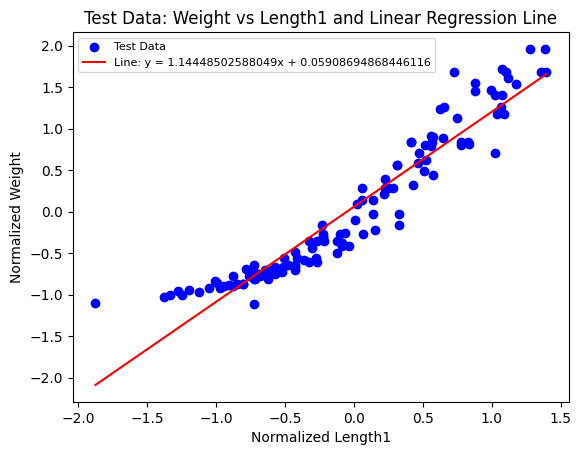

In [22]:
# Scatter Plot: weight vs Length1 for the test data
plt.scatter(feature_1_normalized[:training_set], target_train, color='blue', label='Test Data')

# Plot the linear regression line (y = w1 * x + b1)
# Generate x values based on the range of Length1 values in the test set
x_values = np.linspace(min(feature_1_normalized[:training_set]), max(feature_1_normalized[:training_set]), 100)
y_values = w1 * x_values + b1  # Using the learned w1 and b1 for prediction

plt.plot(x_values, y_values, color='red', label=f'Line: y = {w1}x + {b1}')

# Adding labels and title
plt.xlabel('Normalized Length1')
plt.ylabel('Normalized Weight')
plt.title('Test Data: Weight vs Length1 and Linear Regression Line')

# Show legend in the top-left corner with smaller font size
plt.legend(loc='upper left', fontsize=8)

# Display the plot
plt.show()


## PLOTTING Weight VS Length2

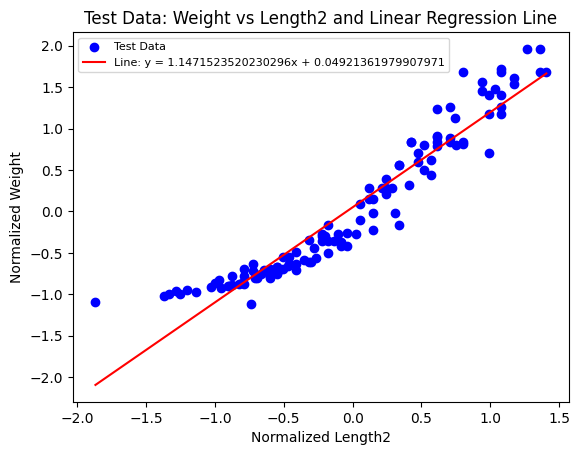

In [21]:
# Plot for feature_2_normalized vs target_test
plt.scatter(feature_2_normalized[:training_set], target_train, color='blue', label='Test Data')

# Plot the linear regression line (y = w2 * x + b2)
x_values = np.linspace(min(feature_2_normalized[:training_set]), max(feature_2_normalized[:training_set]), 100)
y_values = w2 * x_values + b2  # Using the learned w2 and b2 for prediction

plt.plot(x_values, y_values, color='red', label=f'Line: y = {w2}x + {b2}')

plt.xlabel('Normalized Length2')
plt.ylabel('Normalized Weight')
plt.title('Test Data: Weight vs Length2 and Linear Regression Line')
plt.legend(loc='upper left', fontsize=8)
plt.show()


## PLOTTING Weight VS Length3

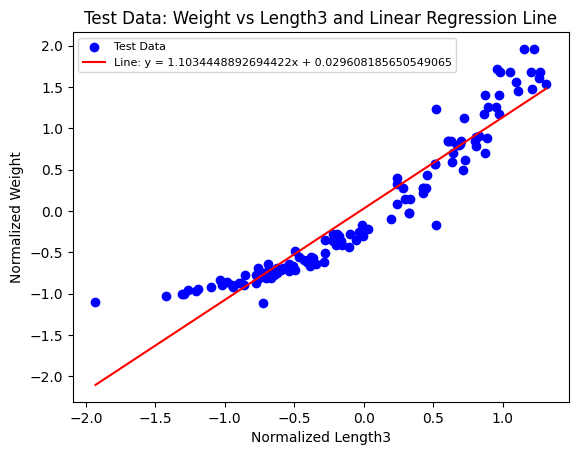

In [24]:
# Plot for feature_3_normalized vs target_test
plt.scatter(feature_3_normalized[:training_set], target_train, color='blue', label='Test Data')

# Plot the linear regression line (y = w3 * x + b3)
x_values = np.linspace(min(feature_3_normalized[:training_set]), max(feature_3_normalized[:training_set]), 100)
y_values = w3 * x_values + b3  # Using the learned w3 and b3 for prediction

plt.plot(x_values, y_values, color='red', label=f'Line: y = {w3}x + {b3}')

plt.xlabel('Normalized Length3')
plt.ylabel('Normalized Weight')
plt.title('Test Data: Weight vs Length3 and Linear Regression Line')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## PLOTTING Weight VS Height

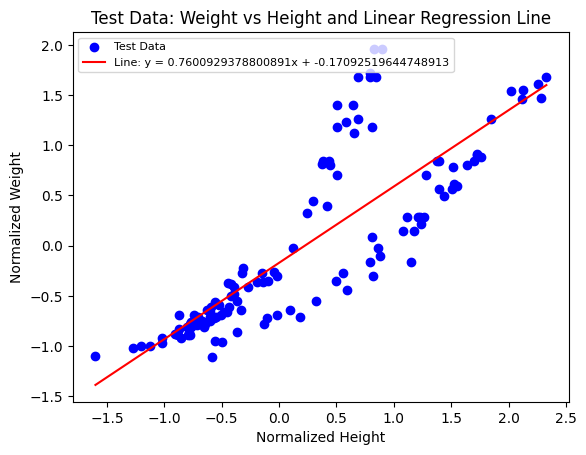

In [25]:
# Plot for feature_4_normalized vs target_test
plt.scatter(feature_4_normalized[:training_set], target_train, color='blue', label='Test Data')

# Plot the linear regression line (y = w4 * x + b4)
x_values = np.linspace(min(feature_4_normalized[:training_set]), max(feature_4_normalized[:training_set]), 100)
y_values = w4 * x_values + b4  # Using the learned w4 and b4 for prediction

plt.plot(x_values, y_values, color='red', label=f'Line: y = {w4}x + {b4}')

plt.xlabel('Normalized Height')
plt.ylabel('Normalized Weight')
plt.title('Test Data: Weight vs Height and Linear Regression Line')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## PLOTTING Weight VS Width

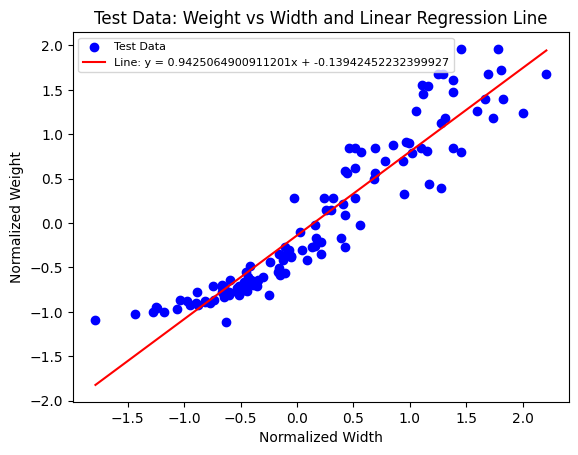

In [26]:
# Plot for feature_5_normalized vs target_test
plt.scatter(feature_5_normalized[:training_set], target_train, color='blue', label='Test Data')

# Plot the linear regression line (y = w5 * x + b5)
x_values = np.linspace(min(feature_5_normalized[:training_set]), max(feature_5_normalized[:training_set]), 100)
y_values = w5 * x_values + b5  # Using the learned w5 and b5 for prediction

plt.plot(x_values, y_values, color='red', label=f'Line: y = {w5}x + {b5}')

plt.xlabel('Normalized Width')
plt.ylabel('Normalized Weight')
plt.title('Test Data: Weight vs Width and Linear Regression Line')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [29]:
# Denormalize the predictions and target values

# For feature_1_normalized vs target_test:
prediction_1 = w1 * feature_1_normalized[training_set:] + b1
prediction_1_denormalized = prediction_1 * target_std + target_mean  # Denormalize prediction
target_test_denormalized = target_test * target_std + target_mean  # Denormalize target test

# Calculate Mean Squared Error for feature_1_normalized vs target_test
mse_1 = np.mean((prediction_1_denormalized - target_test_denormalized)**2)
print(f'Mean Squared Error for feature_1 (Length1) vs Weight: {mse_1:.2f}')

# For feature_2_normalized vs target_test:
prediction_2 = w2 * feature_2_normalized[training_set:] + b2
prediction_2_denormalized = prediction_2 * target_std + target_mean  # Denormalize prediction

mse_2 = np.mean((prediction_2_denormalized - target_test_denormalized)**2)
print(f'Mean Squared Error for feature_2 (Length2) vs Weight: {mse_2:.2f}')

# For feature_3_normalized vs target_test:
prediction_3 = w3 * feature_3_normalized[training_set:] + b3
prediction_3_denormalized = prediction_3 * target_std + target_mean  # Denormalize prediction

mse_3 = np.mean((prediction_3_denormalized - target_test_denormalized)**2)
print(f'Mean Squared Error for feature_3 (Length3) vs Weight: {mse_3:.2f}')

# For feature_4_normalized vs target_test:
prediction_4 = w4 * feature_4_normalized[training_set:] + b4
prediction_4_denormalized = prediction_4 * target_std + target_mean  # Denormalize prediction

mse_4 = np.mean((prediction_4_denormalized - target_test_denormalized)**2)
print(f'Mean Squared Error for feature_4 (Height) vs Weight: {mse_4:.2f}')

# For feature_5_normalized vs target_test:
prediction_5 = w5 * feature_5_normalized[training_set:] + b5
prediction_5_denormalized = prediction_5 * target_std + target_mean  # Denormalize prediction

mse_5 = np.mean((prediction_5_denormalized - target_test_denormalized)**2)
print(f'Mean Squared Error for feature_5 (Width) vs Weight: {mse_5:.2f}')


Mean Squared Error for feature_1 (Length1) vs Weight: 103414.81
Mean Squared Error for feature_2 (Length2) vs Weight: 101401.34
Mean Squared Error for feature_3 (Length3) vs Weight: 80164.81
Mean Squared Error for feature_4 (Height) vs Weight: 202708.24
Mean Squared Error for feature_5 (Width) vs Weight: 109252.66


#### Saving the model

In [30]:
np.savez('length1_vs_weight.npz', 
         weights=w1, 
         bias=b1, 
         features_mean=feature_1_mean, 
         features_std= feature_1_std,
         target_mean=target_mean,
         target_std=target_std)

np.savez('length2_vs_weight.npz', 
         weights=w2, 
         bias=b2, 
         features_mean=feature_2_mean, 
         features_std= feature_2_std,
         target_mean=target_mean,
         target_std=target_std)


np.savez('length3_vs_weight.npz', 
         weights=w3, 
         bias=b3, 
         features_mean=feature_3_mean, 
         features_std= feature_3_std,
         target_mean=target_mean,
         target_std=target_std)


np.savez('height_vs_weight.npz', 
         weights=w4, 
         bias=b4, 
         features_mean=feature_4_mean, 
         features_std= feature_4_std,
         target_mean=target_mean,
         target_std=target_std)


np.savez('width_vs_weight.npz', 
         weights=w5, 
         bias=b5, 
         features_mean=feature_5_mean, 
         features_std= feature_5_std,
         target_mean=target_mean,
         target_std=target_std)

print("Model saved")

# To load the model later, we can use:
# loaded_model = np.load('linear_regression_model.npz')
# w = loaded_model['weights']
# b = loaded_model['bias']

Model saved
